In [2]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import random
import pylab 
plt.rcParams['figure.figsize'] = [10, 5]
from lifelines.statistics import logrank_test

In [3]:
df = pd.read_csv("./classified.csv")
df["Age"]=2020-df["Earliest_Pub"]
df["citperyear"] = df["Citations"]/df["Age"]
df["citperyear13"] = df["Citations"]/df["Age"]**1.3

#to debug
df = df[df["Age"]>=0]
df.head()

,School,Gender,Role,Citations,Earliest_Pub,Field_1,Field_2,Major field,Age,citperyear,citperyear13
0,Arizona State University,Male,Professor,223,1986,Systems theory; control,NaN,Applied Math,34,6.558824,2.277101
1,Arizona State University,Male,Professor,148,1985,Statistics,NaN,Statistics,35,4.228571,1.455369
2,Arizona State University,Male,Professor,172,1983,"Statistical mechanics, structure of matter",NaN,Mathematical Physics,37,4.648649,1.573498
3,Arizona State University,Male,Professor,703,1982,Special functions,NaN,Analysis,38,18.500000,6.212074
4,Arizona State University,Male,Professor,346,1979,Several complex variables and analytic spaces,NaN,Complex Analysis,41,8.439024,2.769855


## Distribution of Citations and Citations/Year1.3

Text(0, 0.5, 'Count')

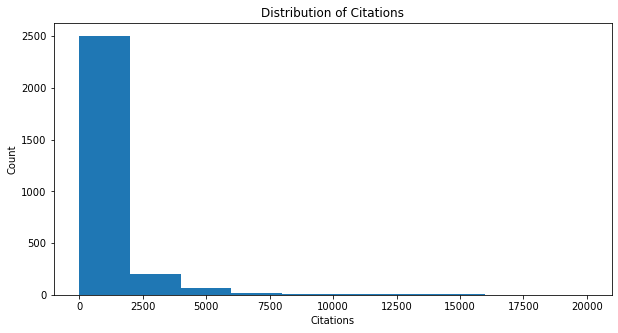

In [4]:
plt.hist(df.Citations)
plt.title("Distribution of Citations")
plt.xlabel("Citations")
plt.ylabel("Count")

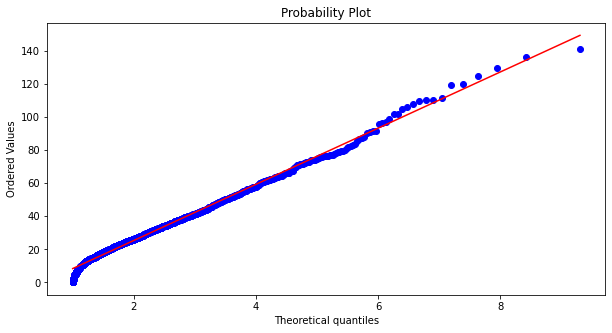

In [5]:
fig = plt.figure()
ax = plt.subplot(111)
stats.probplot(df.Citations**0.5, dist=stats.expon, sparams=1.0, plot=ax)
plt.show()

Text(0, 0.5, 'Count')

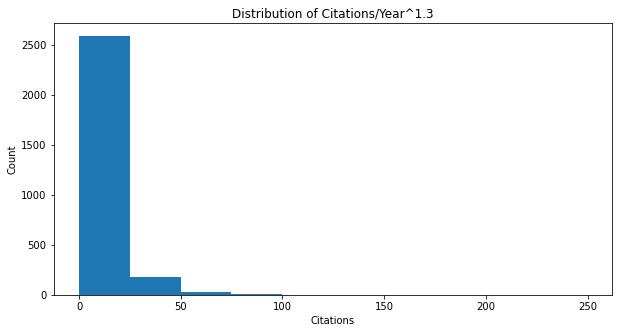

In [6]:
plt.hist(df.citperyear13)
plt.title("Distribution of Citations/Year^1.3")
plt.xlabel("Citations")
plt.ylabel("Count")

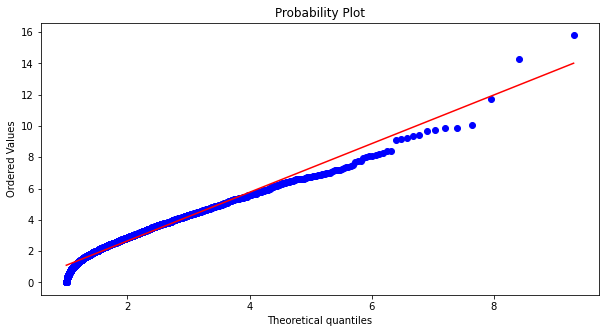

In [7]:
fig = plt.figure()
ax = plt.subplot(111)
stats.probplot(df.citperyear13**0.5, dist=stats.expon, sparams=1.0, plot=ax)
plt.show()

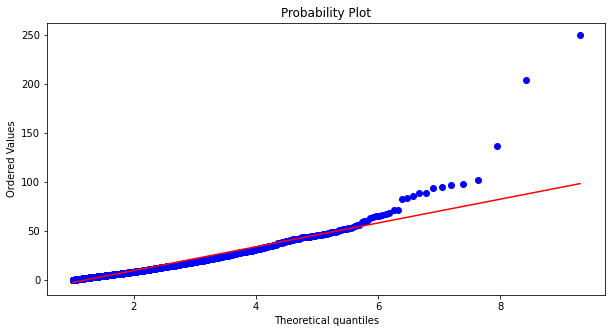

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
stats.probplot(df.citperyear13, dist=stats.expon, sparams=1.0, plot=ax)
plt.show()

**NOTE** the above is a *better* fit at the low range, and obviously has too fat a tail. So unclear if the 0.5 is needed.

## Citations and Age

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Age"],df["citperyear13"])

confidence_interval = 1.96*std_err
print("slope:", slope)
print("intercept:", intercept)
print("r", r_value)
print("pvalue", p_value)
print([slope-confidence_interval, slope+confidence_interval])

slope: 0.03383062665247128
intercept: 8.396234644794568
r 0.029228386522290237
pvalue 0.12157561478012142
[-0.008985684829031844, 0.07664693813397441]


In [10]:
x = np.linspace(0,70,1000)
y = slope*x + intercept

Text(0, 0.5, 'Citations/Year^1.3')

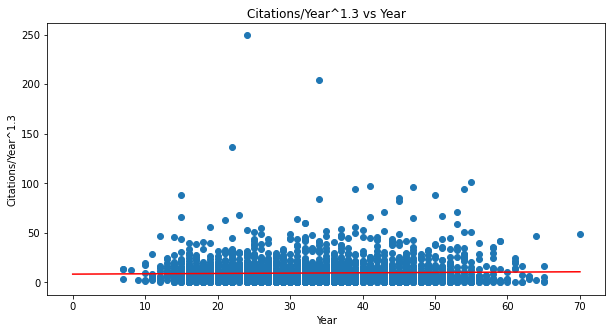

In [11]:
plt.scatter(df["Age"],df["citperyear13"])
plt.plot(x,y,color='red')
plt.title("Citations/Year^1.3 vs Year")
plt.xlabel("Year")
plt.ylabel("Citations/Year^1.3")

## Hasse Linear Models is in RMarkdown

## Field Means and Medians

In [12]:
field = pd.pivot_table(df,index=["Major field"],values=["Citations"],aggfunc=[np.mean])
# change to median
field.unstack().sort_values(ascending=False)

                 Major field         
mean  Citations  PDE                     1472.069892
                 Computer Science        1260.444444
                 Probability             1165.919708
                 Harmonic analysis       1120.015000
                 Combinatorics           1023.241379
                 Analysis                 977.177778
                 Algebra                  934.422727
                 Geometry                 890.684887
                 Algebraic Geometry       846.621302
                 Number theory            742.660377
                 Group theory             686.382716
                 Applied Math             646.602007
                 Mathematical Physics     643.010417
                 Logic                    634.000000
                 Complex Analysis         612.860870
                 Dynamics                 560.441176
                 Lie Groups               512.023256
                 Statistics               220.734940
        

In [13]:
field = pd.pivot_table(df,index=["Major field"],values=["citperyear13"],aggfunc=[np.mean])

field.unstack().sort_values(ascending=False)

                    Major field         
mean  citperyear13  PDE                     14.576598
                    Computer Science        14.080446
                    Probability             12.062677
                    Harmonic analysis       10.514860
                    Combinatorics           10.084229
                    Algebraic Geometry       9.509696
                    Algebra                  9.116993
                    Geometry                 8.868060
                    Number theory            7.382772
                    Dynamics                 7.326294
                    Mathematical Physics     7.248634
                    Analysis                 7.148419
                    Applied Math             6.870968
                    Group theory             6.737234
                    Logic                    6.317548
                    Complex Analysis         6.170996
                    Lie Groups               4.780825
                    Statistics           

In [14]:
count = pd.pivot_table(df,index=["Major field"],values=["citperyear13"],aggfunc=[len])
count.unstack().sort_values(ascending=False)[:30]

                   Major field         
len  citperyear13  PDE                     372.0
                   Geometry                311.0
                   Applied Math            299.0
                   Computer Science        225.0
                   Algebra                 220.0
                   Harmonic analysis       200.0
                   Algebraic Geometry      169.0
                   Number theory           159.0
                   Probability             137.0
                   Combinatorics           116.0
                   Complex Analysis        115.0
                   Mathematical Physics     96.0
                   Statistics               83.0
                   Group theory             81.0
                   Dynamics                 68.0
                   Logic                    55.0
                   Analysis                 45.0
                   Lie Groups               43.0
                   Other                    11.0
                   History   

In [15]:
PDE = df[df["Major field"]=="PDE"]["citperyear13"].values
CS = df[df["Major field"]=="Computer Science"]["citperyear13"].values
Probability = df[df["Major field"]=="Probability"]["citperyear13"].values
Harmonic_Analysis = df[df["Major field"]=="Harmonic analysis"]["citperyear13"].values
Comb = df[df["Major field"]=="Combinatorics"]["citperyear13"].values
Algebra = df[df["Major field"]=="Algebra"]["citperyear13"].values
Alg_Geometry = df[df["Major field"]=="Algebraic Geometry"]["citperyear13"].values
Geometry = df[df["Major field"]=="Geometry"]["citperyear13"].values
Number_Theory = df[df["Major field"]=="Number theory"]["citperyear13"].values
Dynamics = df[df["Major field"]=="Dynamics"]["citperyear13"].values
M_Physics = df[df["Major field"]=="Mathematical Physics"]["citperyear13"].values
Analysis = df[df["Major field"]=="Analysis"]["citperyear13"].values
Applied_Math = df[df["Major field"]=="Applied Math"]["citperyear13"].values
Groups = df[df["Major field"]=="Group theory"]["citperyear13"].values
Logic = df[df["Major field"]=="Logic"]["citperyear13"].values
Complex_Analysis = df[df["Major field"]=="Complex Analysis"]["citperyear13"].values
Lie_Groups = df[df["Major field"]=="Lie Groups"]["citperyear13"].values
Statistics = df[df["Major field"]=="Statistics"]["citperyear13"].values
History = df[df["Major field"]=="History"]["citperyear13"].values
Other = df[df["Major field"]=="Other"]["citperyear13"].values

L = [("PDE",PDE),("CS",CS),("Prob",Probability), ("HA",Harmonic_Analysis), ("C",Comb), ("Alg",Algebra)
     ,("AG",Alg_Geometry), ("GEOM",Geometry), ("NT",Number_Theory),
    ("Dyn",Dynamics), ("MP",M_Physics), ("An",Analysis), ("Applied",Applied_Math), ("GT",Groups)
     , ("Log",Logic), ("CA",Complex_Analysis), ("LG",Lie_Groups), ("Stat",Statistics),
    ("Hist",History), ("Oth",Other)]

In [16]:
def run_permutation_test(pooled,sizeZ,sizeY):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return starY.mean() - starZ.mean()
def check(list1): 
    count = 0
    for x in list1: 
        if x<= delta: 
            count +=1
    return count/len(list1)

In [17]:
#H0 Z = Y
#H1 Z > Y
done = []
for z in L:
    done.append(z)
    for y in L:
        if y not in done:
            np.random.seed(0)
            pooled = np.hstack([z[1],y[1]])
            delta = y[1].mean() - z[1].mean()
            numSamples = 10000
            l=[]
            for i in range(numSamples):
                x = run_permutation_test(pooled,z[1].size,y[1].size)
                l.append(x)
            if check(l) > 0.05:
                print("Fail to Reject Null:", z[0], ">=", y[0], "p-value:", check(l))

Fail to Reject Null: PDE >= CS p-value: 0.397
Fail to Reject Null: PDE >= Prob p-value: 0.0768
Fail to Reject Null: CS >= Prob p-value: 0.156
Fail to Reject Null: Prob >= HA p-value: 0.113
Fail to Reject Null: Prob >= C p-value: 0.1049
Fail to Reject Null: HA >= C p-value: 0.3824
Fail to Reject Null: HA >= Alg p-value: 0.0961
Fail to Reject Null: HA >= AG p-value: 0.1807
Fail to Reject Null: C >= Alg p-value: 0.2181
Fail to Reject Null: C >= AG p-value: 0.3265
Fail to Reject Null: C >= GEOM p-value: 0.1544
Fail to Reject Null: C >= An p-value: 0.0719
Fail to Reject Null: Alg >= AG p-value: 0.6461
Fail to Reject Null: Alg >= GEOM p-value: 0.3989
Fail to Reject Null: Alg >= Dyn p-value: 0.0813
Fail to Reject Null: Alg >= MP p-value: 0.0546
Fail to Reject Null: Alg >= An p-value: 0.1232
Fail to Reject Null: AG >= GEOM p-value: 0.2533
Fail to Reject Null: AG >= An p-value: 0.0782
Fail to Reject Null: GEOM >= NT p-value: 0.0534
Fail to Reject Null: GEOM >= Dyn p-value: 0.1076
Fail to Reject

## Variability Hypothesis

In [18]:
print(np.mean(df.Citations))
print(np.std(df.Citations))

931.9597434983968
1500.2868283479086


In [19]:
Females = df[df.Gender == "Female"]
Males = df[df.Gender == "Male"]
print("Female Mean", np.mean(Females.Citations))
print("Female Variance", np.var(Females.Citations))
print("Male Mean", np.mean(Males.Citations))
print("Male Variance", np.var(Males.Citations))

Female Mean 475.7096774193548
Female Variance 511979.92861602537
Male Mean 988.6027232679215
Male Variance 2437689.032399479


In [20]:
print("Female Mean", np.mean(Females.citperyear13))
print("Female Variance", np.var(Females.citperyear13))
print("Male Mean", np.mean(Males.citperyear13))
print("Male Variance", np.var(Males.citperyear13))

Female Mean 6.185259695940214
Female Variance 61.87624234454585
Male Mean 9.924544583298573
Male Variance 177.20499362227673


Text(0, 0.5, 'Count')

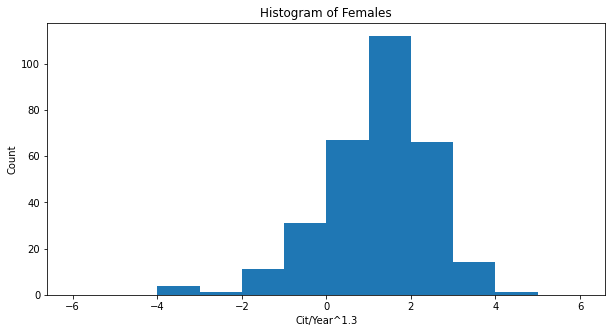

In [21]:
plt.hist(np.log(Females[Females.citperyear13>0].citperyear13),bins=[-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
plt.title("Histogram of Females")
plt.xlabel("Cit/Year^1.3")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

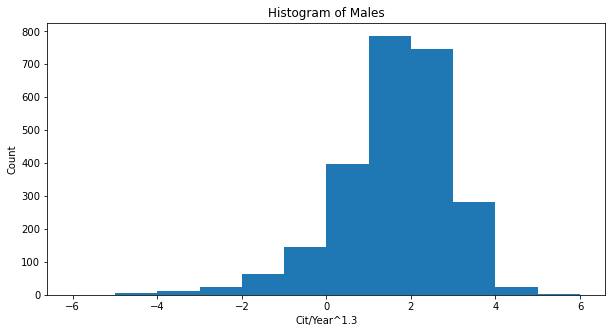

In [22]:
plt.hist(np.log(Males[Males.citperyear13>0].citperyear13),bins=[-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
plt.title("Histogram of Males")
plt.xlabel("Cit/Year^1.3")
plt.ylabel("Count")

# permutation test

In [23]:
FieldNames = ["PDE","Computer Science","Probability","Harmonic analysis","Combinatorics","Algebra"
              ,"Algebraic Geometry","Geometry","Number theory","Dynamics","Mathematical Physics"
              ,"Analysis","Applied Math","Group theory","Logic","Complex Analysis","Lie Groups"
              ,"Statistics","History","Other"]

In [24]:
#H0 Z = Y
#H1 Z > Y
for x in FieldNames:
    M = df[(df["Major field"]==x)&(df["Gender"]=="Male")]["citperyear13"].values
    F = df[(df["Major field"]==x)&(df["Gender"]=="Female")]["citperyear13"].values
    np.random.seed(0)
    pooled = np.hstack([M,F])
    delta = F.mean() - M.mean()
    numSamples = 10000
    l=[]
    for i in range(numSamples):
        y = run_permutation_test(pooled,M.size,F.size)
        l.append(y)
    if check(l) > 0.05:
        print(x," - Fail to Reject Null:", "p-value:", check(l))
    else:
        print(x, " - Reject Null:",  "p-value:", check(l))

PDE  - Reject Null: p-value: 0.0066
Computer Science  - Reject Null: p-value: 0.0346
Probability  - Reject Null: p-value: 0.0035
Harmonic analysis  - Fail to Reject Null: p-value: 0.2648
Combinatorics  - Fail to Reject Null: p-value: 0.2133
Algebra  - Reject Null: p-value: 0.0287
Algebraic Geometry  - Reject Null: p-value: 0.0459
Geometry  - Reject Null: p-value: 0.0096
Number theory  - Reject Null: p-value: 0.0092
Dynamics  - Fail to Reject Null: p-value: 0.145
Mathematical Physics  - Fail to Reject Null: p-value: 0.8623
Analysis  - Reject Null: p-value: 0.0074
Applied Math  - Fail to Reject Null: p-value: 0.1121
Group theory  - Fail to Reject Null: p-value: 0.1791
Logic  - Fail to Reject Null: p-value: 0.0755
Complex Analysis  - Reject Null: p-value: 0.0093
Lie Groups  - Fail to Reject Null: p-value: 0.128
Statistics  - Fail to Reject Null: p-value: 0.0589
History  - Fail to Reject Null: p-value: 1.0
Other  - Fail to Reject Null: p-value: 0.1849


**NOTE** Observe that all failures to reject null occur in fields with very few women.

In [25]:
field = pd.pivot_table(Males,index=["Major field"],values=["citperyear13"],aggfunc=[np.mean])

field.unstack().sort_values(ascending=False)

                    Major field         
mean  citperyear13  PDE                     15.303093
                    Computer Science        14.778782
                    Probability             12.834559
                    Harmonic analysis       10.669366
                    Combinatorics           10.430640
                    Algebraic Geometry       9.819881
                    Algebra                  9.560960
                    Geometry                 9.255244
                    Analysis                 7.935402
                    Number theory            7.679638
                    Dynamics                 7.636188
                    Applied Math             7.161173
                    Group theory             6.968285
                    Mathematical Physics     6.958035
                    Logic                    6.573246
                    Complex Analysis         6.459399
                    Lie Groups               5.083902
                    Statistics           

In [26]:
field = pd.pivot_table(Males,index=["Major field"],values=["citperyear13"],aggfunc=[len])

field.unstack().sort_values(ascending=False)

                   Major field         
len  citperyear13  PDE                     327.0
                   Geometry                279.0
                   Applied Math            250.0
                   Computer Science        200.0
                   Algebra                 192.0
                   Harmonic analysis       183.0
                   Algebraic Geometry      156.0
                   Number theory           147.0
                   Probability             124.0
                   Complex Analysis        107.0
                   Combinatorics           101.0
                   Mathematical Physics     88.0
                   Group theory             74.0
                   Statistics               72.0
                   Dynamics                 59.0
                   Logic                    51.0
                   Analysis                 40.0
                   Lie Groups               37.0
                   Other                     9.0
                   History   

In [27]:
field = pd.pivot_table(Females,index=["Major field"],values=["citperyear13"],aggfunc=[np.mean])

field.unstack().sort_values(ascending=False)

                    Major field         
mean  citperyear13  Mathematical Physics    10.445227
                    PDE                      9.297398
                    Harmonic analysis        8.851647
                    Computer Science         8.493759
                    Combinatorics            7.751730
                    Algebra                  6.072650
                    Algebraic Geometry       5.787476
                    Geometry                 5.492292
                    Applied Math             5.390328
                    Dynamics                 5.294767
                    Probability              4.700109
                    Group theory             4.294694
                    Number theory            3.746161
                    Logic                    3.057404
                    Lie Groups               2.911850
                    Complex Analysis         2.313612
                    History                  1.353940
                    Statistics           

In [28]:
field = pd.pivot_table(Females,index=["Major field"],values=["citperyear13"],aggfunc=[len])

field.unstack().sort_values(ascending=False)

                   Major field         
len  citperyear13  Applied Math            49.0
                   PDE                     45.0
                   Geometry                32.0
                   Algebra                 28.0
                   Computer Science        25.0
                   Harmonic analysis       17.0
                   Combinatorics           15.0
                   Probability             13.0
                   Algebraic Geometry      13.0
                   Number theory           12.0
                   Statistics              11.0
                   Dynamics                 9.0
                   Complex Analysis         8.0
                   Mathematical Physics     8.0
                   Group theory             7.0
                   Lie Groups               6.0
                   Analysis                 5.0
                   Logic                    4.0
                   Other                    2.0
                   History                  1.0


 It would be nonsense to compare variance using a permutation test. The fact is that if you subsample from a larger population, the subsample will be larger


# Interfield Z-scores

In [29]:
dflist = []
for i, j in df.groupby('Major field'):
    #display(j)
    ss = StandardScaler()
    newcol = ss.fit_transform(j[['citperyear13']])
    newercol = pd.DataFrame(newcol, columns = ['zscore'], index=j.index)
    #display(newercol)
    #display(newercol.info())
    newdf = pd.concat([j, newercol], axis=1)
    dflist.append(newdf)
standardized = pd.concat(dflist)
standardized.head()

,School,Gender,Role,Citations,Earliest_Pub,Field_1,Field_2,Major field,Age,citperyear,citperyear13,zscore
33,Auburn University,Male,Professor,105,1976,Linear and multilinear algebra; matrix theory,NaN,Algebra,44,2.386364,0.766833,-0.808969
49,Auburn University,Male,Professor,1734,1981,Associative rings and algebras,NaN,Algebra,39,44.461538,14.813753,0.551906
54,Binghamton University,Male,Professor,280,1977,Nonassociative rings and algebras,NaN,Algebra,43,6.511628,2.106925,-0.679140
100,Brandeis University,Male,Professor,629,1979,Associative rings and algebras,NaN,Algebra,41,15.341463,5.035373,-0.395430
112,Brown University,Male,Professor,190,1991,Algebraic topology,NaN,Algebra,29,6.551724,2.385812,-0.652121


In [30]:
# sanity check. All sd are same
for x in standardized["Major field"].unique():
    fjj = standardized[standardized["Major field"] == x]["zscore"]
    print(x, np.std(fjj))

Algebra 1.0000000000000002
Algebraic Geometry 0.9999999999999999
Analysis 1.0
Applied Math 0.9999999999999996
Combinatorics 0.9999999999999998
Complex Analysis 1.0000000000000002
Computer Science 0.9999999999999996
Dynamics 1.0
Geometry 1.0
Group theory 0.9999999999999998
Harmonic analysis 0.9999999999999998
History 1.0
Lie Groups 0.9999999999999998
Logic 1.0
Mathematical Physics 1.0000000000000004
Number theory 0.9999999999999997
Other 0.9999999999999999
PDE 0.9999999999999997
Probability 1.0
Statistics 1.0


In [31]:
malezs = standardized[standardized.Gender == 'Male'].groupby('Major field').zscore.mean()

In [32]:
malezs

Major field
Algebra                 0.043012
Algebraic Geometry      0.031507
Analysis                0.069864
Applied Math            0.030875
Combinatorics           0.028480
Complex Analysis        0.045660
Computer Science        0.033556
Dynamics                0.050350
Geometry                0.037718
Group theory            0.030517
Harmonic analysis       0.014618
History                -1.000000
Lie Groups              0.070359
Logic                   0.047046
Mathematical Physics   -0.035800
Number theory           0.041191
Other                   0.159438
PDE                     0.036768
Probability             0.062815
Statistics              0.062458
Name: zscore, dtype: float64

In [33]:
femalezs = standardized[standardized.Gender == 'Female'].groupby('Major field').zscore.mean()

In [34]:
femalezs

Major field
Algebra                -0.294938
Algebraic Geometry     -0.378085
Analysis               -0.558912
Applied Math           -0.157523
Combinatorics          -0.191768
Complex Analysis       -0.610698
Computer Science       -0.268447
Dynamics               -0.330075
Geometry               -0.328856
Group theory           -0.322607
Harmonic analysis      -0.157354
History                 1.000000
Lie Groups             -0.433881
Logic                  -0.599834
Mathematical Physics    0.393799
Number theory          -0.504593
Other                  -0.717472
PDE                    -0.267181
Probability            -0.599158
Statistics             -0.408814
Name: zscore, dtype: float64

In [35]:
cohenzs = malezs - femalezs

In [36]:
cohenzs

Major field
Algebra                 0.337950
Algebraic Geometry      0.409593
Analysis                0.628776
Applied Math            0.188398
Combinatorics           0.220248
Complex Analysis        0.656358
Computer Science        0.302003
Dynamics                0.380425
Geometry                0.366574
Group theory            0.353124
Harmonic analysis       0.171971
History                -2.000000
Lie Groups              0.504240
Logic                   0.646880
Mathematical Physics   -0.429599
Number theory           0.545784
Other                   0.876910
PDE                     0.303949
Probability             0.661973
Statistics              0.471272
Name: zscore, dtype: float64

**Cohen Z scores** Mathematical physics is an interesting outlier.

Text(0.5, 1.0, 'Boxplot of Z-scores vs Gender')

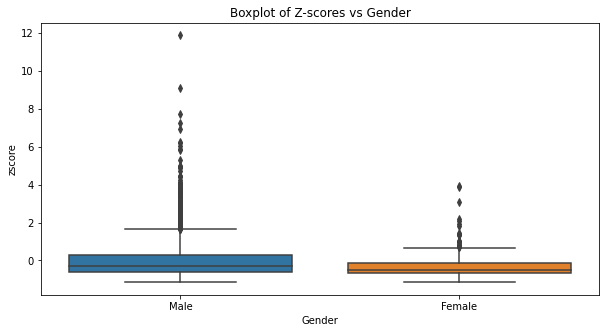

In [37]:
sns.boxplot(x="Gender", y="zscore", data = standardized)
plt.title("Boxplot of Z-scores vs Gender")

Text(0, 0.5, 'Counts')

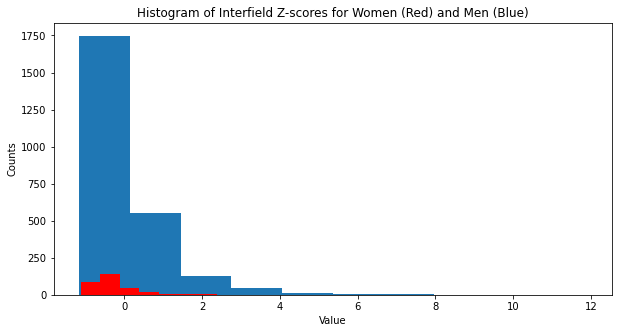

In [38]:
np.random.seed(0)
plt.hist(standardized[standardized["Gender"]=="Male"].zscore)
plt.hist(standardized[standardized["Gender"]=="Female"].zscore, color = "red")
plt.title("Histogram of Interfield Z-scores for Women (Red) and Men (Blue)")
plt.xlabel("Value")
plt.ylabel("Counts")

(array([ 89., 143.,  45.,  18.,   6.,   3.,   3.,   0.,   1.,   2.]),
 array([-1.12090172, -0.61820019, -0.11549866,  0.38720287,  0.8899044 ,
         1.39260593,  1.89530746,  2.39800899,  2.90071052,  3.40341205,
         3.90611358]),
 <a list of 10 Patch objects>)

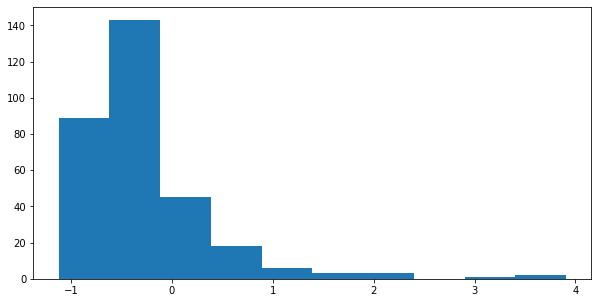

In [39]:
www = standardized[standardized["Gender"]=="Female"]
plt.hist(www.zscore)

(array([1.747e+03, 5.540e+02, 1.290e+02, 4.500e+01, 1.200e+01, 5.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-1.16035535,  0.14388169,  1.44811873,  2.75235577,  4.05659281,
         5.36082985,  6.66506689,  7.96930393,  9.27354097, 10.57777801,
        11.88201505]),
 <a list of 10 Patch objects>)

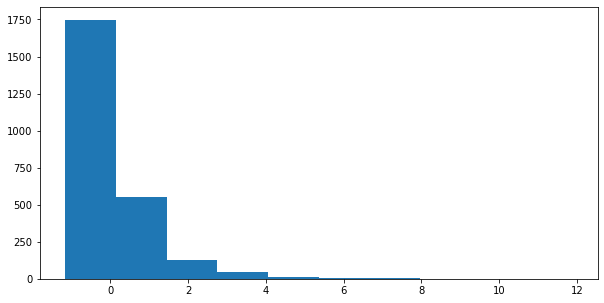

In [40]:
mmm = standardized[standardized["Gender"]=="Male"]
plt.hist(mmm.zscore)

In [41]:
www

,School,Gender,Role,Citations,Earliest_Pub,Field_1,Field_2,Major field,Age,citperyear,citperyear13,zscore
258,Cornell University,Female,Professor,898,1989,Commutative rings and algebras,NaN,Algebra,31,28.967742,10.339657,0.118452
530,Indiana University Bloomington,Female,Professor,56,1992,K-theory,NaN,Algebra,28,2.000000,0.736008,-0.811955
690,Michigan State University,Female,Professor,118,1975,Associative rings and algebras,NaN,Algebra,45,2.622222,0.836962,-0.802175
804,North Carolina State University,Female,Professor,125,1994,Commutative rings and algebras,NaN,Algebra,26,4.807692,1.809025,-0.708001
810,North Carolina State University,Female,Professor,21,1976,Associative rings and algebras,NaN,Algebra,44,0.477273,0.153367,-0.868402
...,...,...,...,...,...,...,...,...,...,...,...,...
1364,The University of Texas at Dallas,Female,Professor,51,1998,Statistics,NaN,Statistics,22,2.318182,0.917108,-0.479032
1647,"University of California, San Diego",Female,Professor,29,1996,Statistics,NaN,Statistics,24,1.208333,0.465718,-0.577903
1723,University of Central Florida,Female,Professor,273,1982,Statistics,NaN,Statistics,38,7.184211,2.412370,-0.151517
2067,University of Maryland - College Park,Female,Professor,106,1990,Statistics,NaN,Statistics,30,3.533333,1.273645,-0.400938


In [42]:
for i, j in standardized.groupby('Gender'):
    display(j.describe())

,Citations,Earliest_Pub,Age,citperyear,citperyear13,zscore
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,475.709677,1992.116129,27.883871,16.554618,6.185260,-0.287867
std,716.684604,9.120165,9.120165,21.400093,7.878863,0.658736
min,0.000000,1967.000000,10.000000,0.000000,0.000000,-1.120902
25%,109.000000,1986.000000,21.000000,4.230252,1.540643,-0.643406
50%,240.000000,1993.000000,27.000000,9.871053,3.798123,-0.491653
75%,615.500000,1999.000000,34.000000,20.492857,7.649517,-0.114883
max,6860.000000,2010.000000,53.000000,170.031250,60.115125,3.906114


,Citations,Earliest_Pub,Age,citperyear,citperyear13,zscore
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,988.602723,1986.400080,33.599920,28.171185,9.924545,0.035738
std,1561.622768,11.194044,11.194044,38.461738,13.314503,1.029228
min,0.000000,1950.000000,7.000000,0.000000,0.000000,-1.160355
25%,215.000000,1979.000000,25.000000,7.176471,2.589171,-0.592701
50%,501.000000,1987.000000,33.000000,16.538462,5.999998,-0.301375
75%,1126.000000,1995.000000,41.000000,34.800000,12.646909,0.302705
max,19975.000000,2013.000000,70.000000,646.958333,249.352048,11.882015


Text(0, 0.5, 'Counts')

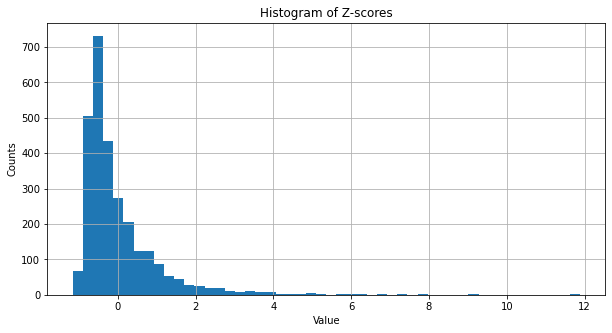

In [43]:
standardized.zscore.hist(bins=50)
plt.title("Histogram of Z-scores")
plt.xlabel("Value")
plt.ylabel("Counts")

# Permutation Test Gender

In [44]:
z = standardized[standardized.Gender=='Male'].zscore
y = standardized[standardized.Gender=='Female'].zscore

print(y.mean())
print(z.mean())
print(y.mean() - z.mean())

-0.2878665164677147
0.035738334042848104
-0.3236048505105628


In [45]:


delta = y.mean() - z.mean()
numSamples = 10000
l=[]
pooled = np.hstack([y,z])

for i in range(numSamples):
    x = run_permutation_test(pooled,z.size,y.size)
    l.append(x)
print(check(l))

0.0


In [46]:
no_pde = standardized[standardized["Major field"]!="PDE"]
no_cs = no_pde[no_pde["Major field"]!= "Computer Science"]

In [47]:
z = standardized[standardized.Gender=='Male'].zscore
y = standardized[standardized.Gender=='Female'].zscore

print(y.mean())
print(z.mean())
print(y.mean() - z.mean())

-0.2878665164677147
0.035738334042848104
-0.3236048505105628


# Rankings of universities top 38

In [49]:
byschool = standardized.groupby('School').zscore.mean().sort_values( ascending=False)

In [51]:
byschool.head(50)

School
Princeton University                           1.772333
Harvard University                             1.465666
Stanford University                            1.019265
University of Chicago                          0.955099
Columbia University in the City of New York    0.902455
Massachusetts Institute of Technology          0.864781
University of California, Los Angeles          0.835296
University of Miami                            0.782862
Yale University                                0.759163
Brown University                               0.617112
University of California, Berkeley             0.592989
New York University                            0.591825
University of Oregon                           0.535733
California Institute of Technology             0.425761
Duke University                                0.399966
Stony Brook University                         0.385291
Rutgers University-New Brunswick               0.323667
University of Virginia                   

It is interesting that so few places are above average...

In [54]:
byschool[50:100]

School
University of Pennsylvania                                       -0.090948
Brandeis University                                              -0.103217
Colorado State University                                        -0.107424
University of Notre Dame                                         -0.112700
University of California, Santa Barbara                          -0.124383
University of North Carolina at Chapel Hill                      -0.126511
University of Houston                                            -0.129775
University of Iowa                                               -0.142739
The Ohio State University                                        -0.158593
University of South Florida                                      -0.162873
Michigan State University                                        -0.176252
University of California, Davis                                  -0.179939
Virginia Polytechnic Institute and State University              -0.182176
University of Miss

In [58]:
byschool[100:]

School
University of Nevada, Reno             -0.449023
West Virginia University               -0.449922
Auburn University                      -0.455573
The University of Texas at Arlington   -0.457660
Texas Tech University                  -0.461208
University of Arizona                  -0.469724
Binghamton University                  -0.473284
University of New Mexico               -0.489398
The University of Alabama              -0.489536
The University of Texas at Dallas      -0.501795
George Mason University                -0.503771
Florida Institute University           -0.505568
University of Oklahoma                 -0.509256
University of Colorado Boulder         -0.511068
University of Hawaii at Manoa          -0.513600
Case Western Reserve University        -0.514692
University of Alabama at Birmingham    -0.515641
Oklahoma State University              -0.519153
Kansas State University                -0.522584
Temple University                      -0.523601
Oregon State 

# tails and gender


In [45]:
standardized = standardized.sort_values("zscore", ascending=False )

In [46]:
standardized[len(standardized)-200:]["Gender"].value_counts()

Male      167
Female     33
Name: Gender, dtype: int64

In [47]:
standardized[:200]["Gender"].value_counts()

Male      192
Female      8
Name: Gender, dtype: int64

In [48]:
standardized["Gender"].value_counts()


Male      2497
Female     310
Name: Gender, dtype: int64

In [49]:
df = df.sort_values("citperyear13", ascending=False  )

In [50]:
df[:200]["Gender"].value_counts()

Male      190
Female     10
Name: Gender, dtype: int64

In [51]:
df[len(df)-200:]["Gender"].value_counts()

Male      166
Female     34
Name: Gender, dtype: int64

### Clustered in bottom at top?

In [52]:
#top 100
slice_top = standardized[:100]
slice_top.Gender.value_counts()

Male      97
Female     3
Name: Gender, dtype: int64

In [53]:
slice_women = slice_top[slice_top["Gender"] == "Female"]
slice_women.zscore.mean()

3.6232122355988667

In [54]:
slice_men = slice_top[slice_top["Gender"] == "Male"]
slice_men.zscore.mean()

3.65971126528825

In [55]:
np.random.seed(0)
z = slice_top[slice_top.Gender=='Male'].zscore
y = slice_top[slice_top.Gender=='Female'].zscore
pooled = np.hstack([z,y])
delta = y.mean() - z.mean()
numSamples = 10000
l=[]
for i in range(numSamples):
    x = run_permutation_test(pooled,z.size,y.size)
    l.append(x)
print(check(l))


0.5922


In [56]:
slice_top = standardized[:200]
slice_top.Gender.value_counts()

Male      192
Female      8
Name: Gender, dtype: int64

In [57]:
slice_women = slice_top[slice_top["Gender"] == "Female"]
slice_women.zscore.mean()

2.54442171448912

In [58]:
slice_men = slice_top[slice_top["Gender"] == "Male"]
slice_men.zscore.mean()

2.750985753970976

In [59]:
# Permutation test
np.random.seed(0)
z = slice_top[slice_top.Gender=='Male'].zscore
y = slice_top[slice_top.Gender=='Female'].zscore
pooled = np.hstack([z,y])
delta = y.mean() - z.mean()
numSamples = 10000
l=[]
for i in range(numSamples):
    x = run_permutation_test(pooled,z.size,y.size)
    l.append(x)
print(check(l))


0.3931


In [60]:
#Top 300

In [61]:
slice_top = standardized[:300]
slice_top.Gender.value_counts()

Male      288
Female     12
Name: Gender, dtype: int64

In [62]:
slice_women = slice_top[slice_top["Gender"] == "Female"]
slice_women.zscore.mean()

2.1259808577743877

In [63]:
slice_men = slice_top[slice_top["Gender"] == "Male"]
slice_men.zscore.mean()

2.2423519281225053

In [64]:
# Permutation test
np.random.seed(0)
z = slice_top[slice_top.Gender=='Male'].zscore
y = slice_top[slice_top.Gender=='Female'].zscore
pooled = np.hstack([z,y])
delta = y.mean() - z.mean()
numSamples = 10000
l=[]
for i in range(numSamples):
    x = run_permutation_test(pooled,z.size,y.size)
    l.append(x)
print(check(l))


0.4332


In [65]:
# Top 400

In [66]:
slice_top = standardized[:400]
slice_top.Gender.value_counts()

Male      384
Female     16
Name: Gender, dtype: int64

**4% of the top 400 people are women!!!!**

In [67]:
slice_women = slice_top[slice_top["Gender"] == "Female"]
slice_women.zscore.mean()

1.8355808851208724

In [68]:
slice_men = slice_top[slice_top["Gender"] == "Male"]
slice_men.zscore.mean()

1.9093396085287047

In [69]:
# Permutation test
np.random.seed(0)
z = slice_top[slice_top.Gender=='Male'].zscore
y = slice_top[slice_top.Gender=='Female'].zscore
pooled = np.hstack([z,y])
delta = y.mean() - z.mean()
print(delta)
numSamples = 10000
l=[]
for i in range(numSamples):
    x = run_permutation_test(pooled,z.size,y.size)
    l.append(x)
print(check(l))


-0.0737587234078323
0.4569


In [66]:
# top 500
slice_top = standardized[:500]
slice_top.Gender.value_counts()


Male      477
Female     23
Name: Gender, dtype: int64

In [67]:
slice_women = slice_top[slice_top["Gender"] == "Female"]
slice_women.zscore.mean()

1.499351891439479

In [68]:
slice_men = slice_top[slice_top["Gender"] == "Male"]
slice_men.zscore.mean()

1.6703892863769825

In [69]:
# Permutation test
np.random.seed(0)
z = slice_top[slice_top.Gender=='Male'].zscore
y = slice_top[slice_top.Gender=='Female'].zscore
pooled = np.hstack([z,y])
delta = y.mean() - z.mean()
print(delta)
numSamples = 10000
l=[]
for i in range(numSamples):
    x = run_permutation_test(pooled,z.size,y.size)
    l.append(x)
print(check(l))


-0.17103739493750347
0.2791


In [70]:
#top 600
slice_top = standardized[:600]
slice_top.Gender.value_counts()


Male      567
Female     33
Name: Gender, dtype: int64

In [71]:
slice_women = slice_top[slice_top["Gender"] == "Female"]
slice_women.zscore.mean()


1.1812153420561602

In [72]:
slice_men = slice_top[slice_top["Gender"] == "Male"]
slice_men.zscore.mean()

1.480999795640049

In [73]:
# Permutation test
np.random.seed(0)
z = slice_top[slice_top.Gender=='Male'].zscore
y = slice_top[slice_top.Gender=='Female'].zscore
pooled = np.hstack([z,y])
delta = y.mean() - z.mean()
print(delta)
numSamples = 10000
l=[]
for i in range(numSamples):
    x = run_permutation_test(pooled,z.size,y.size)
    l.append(x)
print(check(l))


-0.2997844535838887
0.0775


In [74]:
#top 700
slice_top = standardized[:700]
slice_top.Gender.value_counts()


Male      660
Female     40
Name: Gender, dtype: int64

In [75]:

slice_women = slice_top[slice_top["Gender"] == "Female"]
slice_women.zscore.mean()

1.0322531915581363

In [76]:
slice_men = slice_top[slice_top["Gender"] == "Male"]
slice_men.zscore.mean()

1.3180622534089776

In [117]:
np.random.seed(0)
z = slice_top[slice_top.Gender=='Male'].zscore
y = slice_top[slice_top.Gender=='Female'].zscore
pooled = np.hstack([z,y])
delta = y.mean() - z.mean()
print(delta)
numSamples = 10000
l=[]
for i in range(numSamples):
    x = run_permutation_test(pooled,z.size,y.size)
    l.append(x)
print(check(l))


-0.32849888336098576
0.0103


In [78]:
# top 800

slice_top = standardized[:800]
slice_top.Gender.value_counts()


Male      754
Female     46
Name: Gender, dtype: int64

In [79]:

slice_women = slice_top[slice_top["Gender"] == "Female"]
slice_women.zscore.mean()


0.924732747419224

In [80]:
slice_men = slice_top[slice_top["Gender"] == "Male"]
slice_men.zscore.mean()

1.1788170884163587

In [81]:
np.random.seed(0)
z = slice_top[slice_top.Gender=='Male'].zscore
y = slice_top[slice_top.Gender=='Female'].zscore
pooled = np.hstack([z,y])
delta = y.mean() - z.mean()
print(delta)
numSamples = 10000
l=[]
for i in range(numSamples):
    x = run_permutation_test(pooled,z.size,y.size)
    l.append(x)
print(check(l))


-0.25408434099713473
0.0716


In [82]:
# top 900

slice_top = standardized[:900]
slice_top.Gender.value_counts()


Male      841
Female     59
Name: Gender, dtype: int64

In [83]:

slice_women = slice_top[slice_top["Gender"] == "Female"]
slice_women.zscore.mean()


0.7365986377840082

In [84]:
slice_men = slice_top[slice_top["Gender"] == "Male"]
slice_men.zscore.mean()

1.065097521144994

In [85]:
np.random.seed(0)
z = slice_top[slice_top.Gender=='Male'].zscore
y = slice_top[slice_top.Gender=='Female'].zscore
pooled = np.hstack([z,y])
delta = y.mean() - z.mean()
print(delta)
numSamples = 10000
l=[]
for i in range(numSamples):
    x = run_permutation_test(pooled,z.size,y.size)
    l.append(x)
print(check(l))


-0.32849888336098576
0.0103


 so until the top 900, women are not clustered at the bottom.

# Adjusting means and then comparing variance

In [86]:
Men = standardized[standardized["Gender"] == "Male"]["zscore"]
Women = standardized[standardized["Gender"] == "Female"]["zscore"]

In [87]:
MS_men = np.mean(Men)**2
MS_women = np.mean(Women)**2

I don't understand what you are doing here...

In [88]:
np.var(Men/MS_men)

649100.151379229

In [89]:
np.var(Women/MS_women)

62.98757916459244

In [90]:
Men = df[df["Gender"]=="Male"]["citperyear13"]
Women = df[df["Gender"]=="Female"]["citperyear13"]

In [91]:
MS_men = np.mean(Men)**2
MS_women = np.mean(Women)**2

In [92]:
np.var(Men/MS_men)

0.01826558592127423

In [93]:
np.var(Women/MS_women)

0.04227583330024709

In [94]:
np.min(standardized["zscore"])

-1.1603553546388397

In [95]:
standardized["poszscore"] = standardized["zscore"]-np.min(standardized["zscore"])

In [96]:
np.min(standardized["poszscore"])

0.0

In [97]:
Men = standardized[standardized["Gender"] == "Male"]["poszscore"]
Women = standardized[standardized["Gender"] == "Female"]["poszscore"]
MS_men = np.mean(Men)**2
MS_women = np.mean(Women)**2
np.var(Men/MS_men)

0.5173543803943632

In [98]:
np.var(Women/MS_women)

0.7464143973299803

# VR Permutation Test

We should compare standardized variances and their ratio. If we compare Var(men)/Var(Women), if it is greater, then we have male var is greater than female var. Otherwise, var men < var men

In [70]:
Men = standardized[standardized["Gender"] == "Male"]["zscore"]
Women = standardized[standardized["Gender"] == "Female"]["zscore"]
observed_var_ratio = np.var(Men)/np.var(Women)

In [71]:
observed_var_ratio

2.4481013824623865

In [72]:
n_m = len(Men)
n_w = len(Women)

In [73]:
def run_var_permutation_test(pooled,sizeZ,sizeY):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return np.var(starZ)/np.var(starY)

np.random.seed(0)
dist = []
pooled = np.hstack([Men,Women])


In [74]:
for i in range(10000):
    x = run_var_permutation_test(pooled,n_m,n_w)
    dist.append(x)

In [75]:
count = 0
for x in dist: 
    if x>= observed_var_ratio: 
        count +=1
count/len(dist)

0.0001

In [78]:
men = standardized[standardized.Gender == 'Male'].zscore

In [79]:
women = standardized[standardized.Gender == 'Female'].zscore

In [80]:
results = logrank_test(men, women)

In [81]:
results.print_summary()

In [82]:
print(results.p_value)

8.11445987141984e-12


In [83]:
print(results.test_statistic)

46.73789549325744


In [85]:
standardized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2807 entries, 1592 to 1922
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   School        2807 non-null   object 
 1   Gender        2807 non-null   object 
 2   Role          2807 non-null   object 
 3   Citations     2807 non-null   int64  
 4   Earliest_Pub  2807 non-null   int64  
 5   Field_1       2807 non-null   object 
 6   Field_2       237 non-null    object 
 7   Major field   2807 non-null   object 
 8   Age           2807 non-null   int64  
 9   citperyear    2807 non-null   float64
 10  citperyear13  2807 non-null   float64
 11  zscore        2807 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 285.1+ KB


In [86]:
for i, j in standardized.groupby('Major field'):
    print(i)
    men = j[j.Gender == 'Male'].zscore
    women = j[j.Gender == 'Female'].zscore
    results = logrank_test(men, women)
    results.print_summary()
    print(results.p_value)
    print(results.test_statistic)

Algebra


0.0299499172031859
4.7121646419298395
Algebraic Geometry


0.04969385978090743
3.851758625001256
Analysis


0.0005024047859027421
12.106718274355591
Applied Math


0.21191047728376633
1.5583261171814615
Combinatorics


0.39134182922835037
0.7347686737779375
Complex Analysis


0.003523127170818473
8.5145774715141
Computer Science


0.018200256971150564
5.576770283206514
Dynamics


0.21335560127642972
1.5485095859461047
Geometry


0.008974672126551491
6.827860165177843
Group theory


0.33785751825741184
0.9185441623178412
Harmonic analysis


0.4117651873370841
0.6736982649696217
History


0.31731050786291115
1.0
Lie Groups


0.24615661060627997
1.3449858677408002
Logic


0.07236539120802622
3.2285351612671254
Mathematical Physics


0.33442400631042163
0.9316906092727837
Number theory


0.007276565713974268
7.203398408670752
Other


0.2039736506866864
1.6136916118356952
PDE


0.011529865799471378
6.381765888971634
Probability


0.0011461426866852388
10.575209670255262
Statistics


0.14226271538051122
2.1533119755501797


**Note** for exponential distribution, mean and standard deviation are the same!!!!

In [95]:
standardized[(standardized['Major field']== 'Mathematical Physics')& (standardized.Gender=='Male')]

,School,Gender,Role,Citations,Earliest_Pub,Field_1,Field_2,Major field,Age,citperyear,citperyear13,zscore
207,Columbia University in the City of New York,Male,Professor,1196,2008,"Statistical mechanics, structure of matter",NaN,Mathematical Physics,12,99.666667,47.292858,4.933182
2433,University of Pennsylvania,Male,Professor,1080,2004,"Statistical mechanics, structure of matter",NaN,Mathematical Physics,16,67.500000,29.381082,2.726570
1013,Rice University,Male,Professor,1731,1997,Quantum theory,NaN,Mathematical Physics,23,75.260870,29.379938,2.726429
2774,Yale University,Male,Professor,1801,1990,"Statistical mechanics, structure of matter",NaN,Mathematical Physics,30,60.033333,21.639941,1.772913
1024,Rutgers University-New Brunswick,Male,Professor,2058,1984,"Statistical mechanics, structure of matter",Partial differential equations,Mathematical Physics,36,57.166667,19.509769,1.510490
...,...,...,...,...,...,...,...,...,...,...,...,...
1543,"University of California, Davis",Male,Professor,9,1992,Mechanics of particles and systems,NaN,Mathematical Physics,28,0.321429,0.118287,-0.878411
627,Massachusetts Institute of Technology,Male,Professor,20,1962,Quantum theory,NaN,Mathematical Physics,58,0.344828,0.101994,-0.880419
2469,University of Rochester,Male,Professor,11,1982,"Statistical mechanics, structure of matter",NaN,Mathematical Physics,38,0.289474,0.097202,-0.881009
721,New Jersey Institute of Technology,Male,Professor,6,1990,"Classical thermodynamics, heat transfer",NaN,Mathematical Physics,30,0.200000,0.072093,-0.884102


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2807 entries, 1592 to 2296
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   School        2807 non-null   object 
 1   Gender        2807 non-null   object 
 2   Role          2807 non-null   object 
 3   Citations     2807 non-null   int64  
 4   Earliest_Pub  2807 non-null   int64  
 5   Field_1       2807 non-null   object 
 6   Field_2       237 non-null    object 
 7   Major field   2807 non-null   object 
 8   Age           2807 non-null   int64  
 9   citperyear    2807 non-null   float64
 10  citperyear13  2807 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 263.2+ KB


In [97]:
ss = StandardScaler()

In [99]:
zzscore = ss.fit_transform(standardized[['zscore']])

In [100]:
zzscore

array([[11.88201505],
       [ 9.12438053],
       [ 7.71900794],
       ...,
       [-1.15437786],
       [-1.15856129],
       [-1.16035535]])

In [102]:
zzr = zzscore.ravel()

In [103]:
np.mean(zzr)

0.0

In [104]:
np.std(zzr)

1.0

In [105]:
standardized['zzscore'] = zzr

In [107]:
standardized[standardized.Gender == 'Male'].zzscore.mean()

0.035738334042847965

In [108]:
standardized[standardized.Gender == 'Female'].zzscore.mean()

-0.2878665164677147

In [109]:
standardized[standardized.Gender == 'Male'].zzscore.std()

1.029227646675371

In [110]:
standardized[standardized.Gender == 'Female'].zzscore.std()

0.6587359577633307

In [111]:
len(standardized[standardized.Gender == 'Female'])

310

In [113]:
len(standardized[(standardized.Gender == 'Female') & (standardized.zzscore < 0.03)])

251

In [114]:
251.0/310.0

0.8096774193548387